In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()


class Extractor(object):
    def __init__(self, path):
        with open(path, "r") as f:
            lines = f.readlines()
        print(lines[0].strip())
        self.epochlines = {}
        for mode in ["train", "test"]:
            key = "({}) Epoch".format(mode)
            self.epochlines[mode] = [line for line in lines if key in line]
        self.iterlines = {}
        for mode in ["train", "test"]:
            key = "({}) Iter".format(mode)
            self.iterlines[mode] = [line for line in lines if key in line]

    def __call__(self, mode, key, epoch=True):
        if epoch:
            lines = self.epochlines[mode]
        else:
            lines = self.iterlines[mode]
        key = "\'{}\'".format(key)
        lines = [re.split('[{}]', line)[1].split(', ') for line in lines]
        lines = [[item for item in line if key in item] for line in lines]
        lines = [float(line[0].split()[1]) for line in lines]
        return np.array(lines)


def get_b_t(data1, data2):
    b = min(data1.min(), data2.min())
    t = max(data1.max(), data2.max())
    return b, t


def show_hist(logfile, _e=-1):
    _s = 5
    _iter_per_batch = 32
    _n = 4

    ext = Extractor(logfile)
    plt.figure(figsize=(8,_n*2))
    plt.suptitle(logfile, x=0.5, y=0.92)

    data1 = ext("train", "x_loss")[:_e]
    data2 = ext("test", "x_loss")[:_e]
    plt.subplot(_n,1,1)
    plt.title("x_loss")
    b, t = get_b_t(data1[_s:], data2[_s:])
    plt.ylim([b-(t-b)*0.1, t+(t-b)*0.1])
    sns.lineplot(data=data1)
    sns.lineplot(data=data2)

    data1 = ext("train", "s_loss")[:_e]
    data2 = ext("test", "s_loss")[:_e]
    plt.subplot(_n,1,2)
    plt.title("s_loss")
    b, t = get_b_t(data1[_s:], data2[_s:])
    plt.ylim([b-(t-b)*0.1, t+(t-b)*0.1])
    sns.lineplot(data=data1)
    sns.lineplot(data=data2)

    # data1 = ext("train", "s_snd_loss")
    # data2 = ext("test", "s_snd_loss")
    # plt.subplot(_n,1,3)
    # plt.title("s_snd_loss")
    # b, t = get_b_t(data1[_s:], data2[_s:])
    # plt.ylim([b-(t-b)*0.1, t+(t-b)*0.1])
    # sns.lineplot(data=data1)
    # sns.lineplot(data=data2)

    data1 = ext("train", "s_over_loss")[:_e]
    data2 = ext("test", "s_over_loss")[:_e]
    plt.subplot(_n,1,3)
    plt.title("s_over_loss")
    b, t = get_b_t(data1[_s:], data2[_s:])
    plt.ylim([b-(t-b)*0.1, t+(t-b)*0.1])
    sns.lineplot(data=data1)
    sns.lineplot(data=data2)

    data1 = ext("train", "g_grad_norm", epoch=False)[:_e]
    plt.subplot(_n,1,4)
    b, t = get_b_t(data1[_s*_iter_per_batch:], data1[_s*_iter_per_batch:])
    plt.title("g_grad_norm")
    plt.ylim([b-(t-b)*0.1, t+(t-b)*0.1])
    sns.lineplot(data=data1)
    plt.axhline(y=1.2e+5, xmin=0, xmax=len(data1), c="k", linestyle=":")

    plt.show()

[I 221115 12:54:52 train:21] Namespace(device=[0], seed=0, stamp='Nov15_125452', ghash='4d97eef', resume_epoch=0, model='rssm', s_dim=64, z_dim=64, v_dim=3, a_dim=0, h_dim=512, size=64, beta_s_snd=None, beta_s_over=1.0, min_stddev=1e-05, data='../data/tonpy-v11/data', logs='../logs/tonpy-v11', iters_to_accumulate=1, B=64, B_val=4, T=10, T_val=10, epochs=3000, max_norm=10000000.0, freq_valid=100, freq_save=100)


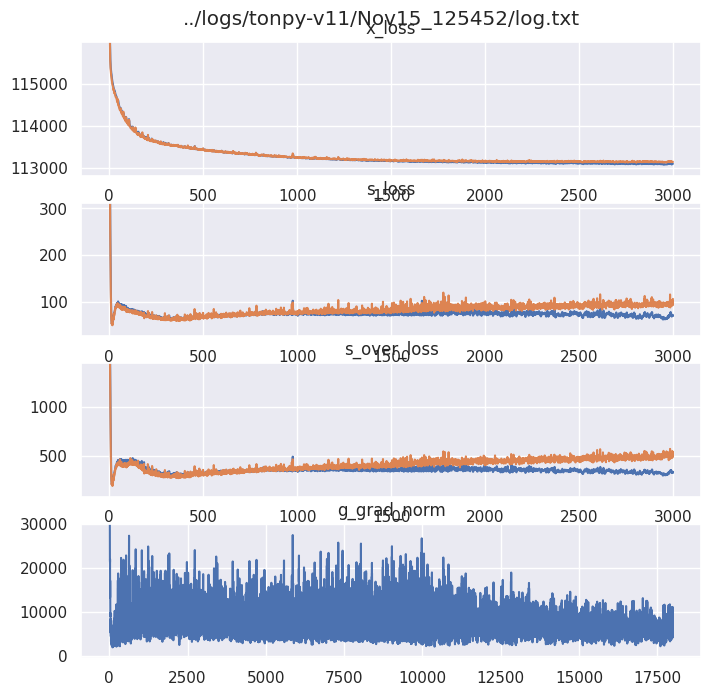

In [90]:
show_hist("../logs/tonpy-v11/Nov15_125452/log.txt")

[I 221115 16:06:36 train:21] Namespace(device=[0], seed=0, stamp='Nov15_160636', ghash='4d97eef', resume_epoch=0, model='rssm', s_dim=64, z_dim=64, v_dim=3, a_dim=0, h_dim=512, size=64, beta_s_snd=None, beta_s_over=1.0, min_stddev=1e-05, data='../data/tonpy-v11/data', logs='../logs/tonpy-v11', iters_to_accumulate=1, B=4, B_val=4, T=10, T_val=10, epochs=3000, max_norm=10000000.0, freq_valid=100, freq_save=100)


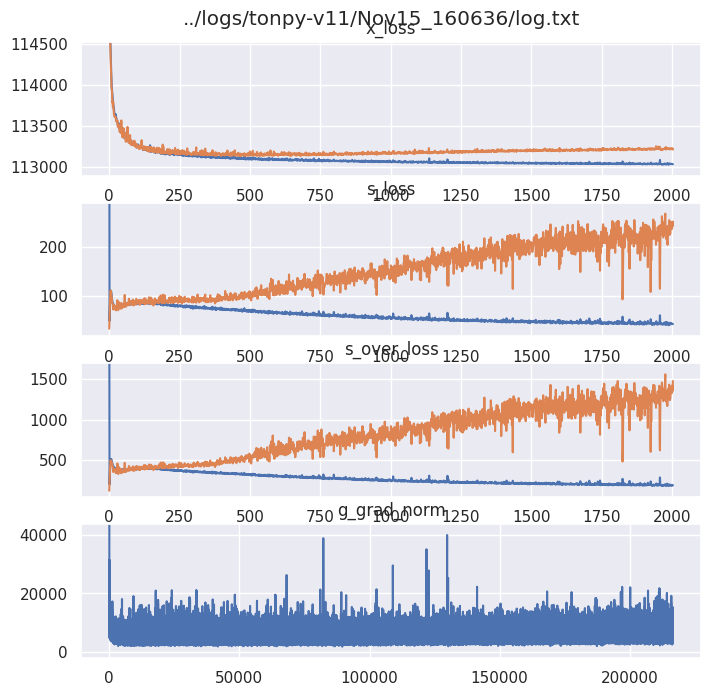

In [91]:
show_hist("../logs/tonpy-v11/Nov15_160636/log.txt")

[I 221116 10:12:41 train:21] Namespace(device=[0], seed=0, stamp='Nov16_101241', ghash='4d97eef', resume_epoch=0, model='rssm', s_dim=64, z_dim=64, v_dim=4, a_dim=0, h_dim=512, size=64, beta_s_snd=None, beta_s_over=1.0, min_stddev=1e-05, data='../data/tonpy-v11/data', logs='../logs/tonpy-v11', iters_to_accumulate=1, B=4, B_val=4, T=10, T_val=10, epochs=3000, max_norm=10000000.0, freq_valid=50, freq_save=50)


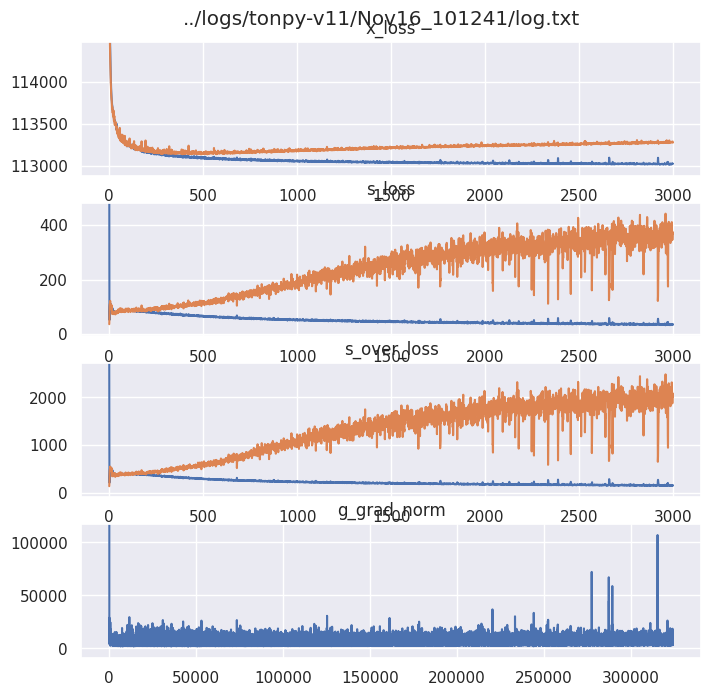

In [92]:
show_hist("../logs/tonpy-v11/Nov16_101241/log.txt")

In [1]:
import os
import glob
import numpy as np
from skvideo.io import vread
import imageio
from copy import deepcopy
from tqdm import tqdm
from db_ssm.config import get_args
from db_ssm.model import SSM
import torch

# python train.py --data ../data/tonpy-v11/data --logs ../logs/tonpy-v11 --size 64 --B 4 --B_val 4 --epochs 3000 --beta_s_over 1. --v_dim 4

args = get_args(args="\
                --logs ../logs/tonpy-v11 \
                --size 64 \
                --v_dim 4 \
                --stamp Nov16_101241 \
                --resume_epoch 3000".split())

model = SSM(args)
model.load(args.resume_epoch)

data_dir = "../data/tonpy-v11/data"
vid_paths = sorted(glob.glob(os.path.join(data_dir, "video", "*.gif")))[:100]
viw_paths = sorted(glob.glob(os.path.join(data_dir, "view", "*.npy")))[:100]
vid = np.array([vread(path) for path in vid_paths]).astype(np.uint8)
viw = np.array([np.load(path) for path in viw_paths]).astype(np.float32)

# print(vid.shape, viw.shape, mot.shape)
print(vid.shape, viw.shape)

load model
(100, 11, 64, 64, 3) (100, 11, 3)


In [2]:
T = 300
x_0 = deepcopy(vid[0][:1]).transpose(0,3,1,2)
ano = np.zeros([T,1]).astype(np.float32)
v = deepcopy(viw).reshape([np.cumprod(viw.shape[:2])[-1], 3])[1:301]
v = np.hstack([v, ano])
print(x_0.shape, v.shape)

x_0 = torch.from_numpy(x_0).to(model.device[0]).float() / 255.
v = torch.from_numpy(v[None]).to(model.device[0])
x_valid = model.sample_x(x_0, v=v, valid=True)[0][0]
x_true = vid.reshape([np.cumprod(vid.shape[:2])[-1]]+list(vid.shape[2:]))[1:301]
x_concat = np.concatenate([x_valid, x_true], axis=2)

imageio.mimwrite(f'pred_{T}f_02.gif', x_valid)
imageio.mimwrite(f'true_{T}f_02.gif', x_true)
imageio.mimwrite(f'concat_{T}f_02.gif', x_concat)

(1, 3, 64, 64) (300, 4)


In [3]:
from tqdm.notebook import tqdm

T = 1000
x_0 = deepcopy(vid[0][0])
ano = np.zeros([T,1]).astype(np.float32)
v = deepcopy(viw).reshape([np.cumprod(viw.shape[:2])[-1], 3])[1:1001]
v = np.hstack([v, ano])

x_pred = []
for t, v_t in enumerate(tqdm(v)):
    if t % 100 == 0:  # reset!
        x_t = model.step(v_t=v_t, x_0=x_0)
    else:
        x_t = model.step(v_t=v_t)
    x_pred.append(x_t)
x_pred = np.array(x_pred)

x_true = vid.reshape([np.cumprod(vid.shape[:2])[-1]]+list(vid.shape[2:]))[1:1001]
x_concat = np.concatenate([x_pred, x_true], axis=2)

imageio.mimwrite(f'pred_{T}f_06.mp4', x_pred, macro_block_size=8)
imageio.mimwrite(f'true_{T}f_06.mp4', x_true, macro_block_size=8)
imageio.mimwrite(f'concat_{T}f_06.mp4', x_concat, macro_block_size=8)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [22]:
vid_paths = sorted(glob.glob(os.path.join(data_dir, "video", "*.gif")))
viw_paths = sorted(glob.glob(os.path.join(data_dir, "view", "*.npy")))
os.makedirs(os.path.dirname(vid_path).replace('video', 'pred_q'), exist_ok=True)


assert len(vid_paths) == len(viw_paths)
N = len(vid_paths)

device = model.device[0]

from tqdm.notebook import tqdm

for t, vid_path, viw_path in zip(tqdm(range(N)), vid_paths, viw_paths):
    vid = vread(vid_path).astype(np.uint8)
    viw = np.load(viw_path).astype(np.float32)

    vid = vid.transpose(0,3,1,2)
    x_0, x = vid[0][None], vid[1:][None]
    ano = np.zeros([len(viw),1]).astype(np.float32)
    v = np.hstack([viw[1:], ano[1:]])[None]

    x_0 = torch.from_numpy(x_0).to(device).float() / 255.
    x = torch.from_numpy(x).to(device).float() / 255.
    v = torch.from_numpy(v).to(device)
    _x, _xq, _xp = model.sample_x(x_0, x=x, v=v, valid=False)

    # _x_concat = np.concatenate([_xq[0], _x[0]], axis=2)
    # imageio.mimwrite('qsample.mp4', _xq[0], macro_block_size=8)
    # imageio.mimwrite('true.mp4', _x[0], macro_block_size=8)
    # imageio.mimwrite('concat.mp4', _x_concat, macro_block_size=8)

    path = vid_path.replace('video', 'pred_q').replace('gif', 'npy')
    np.save(path, _xq[0])

  0%|          | 0/504 [00:00<?, ?it/s]

In [25]:
print(path)
xq = np.load(path)
imageio.mimwrite('qsample.mp4', xq, macro_block_size=8)

../data/tonpy-v11/data/pred_q/0503.npy


In [24]:
xq.shape

(10, 64, 64, 3)

In [5]:
import cv2
import numpy as np
import os
import glob
import imageio
from tqdm.notebook import tqdm


data_dir = "../data/tonpy-v11/pred"
vid_paths = sorted(glob.glob(os.path.join(data_dir, "pred_q", "*.npy")))
os.makedirs(os.path.join(data_dir, 'flow_q'), exist_ok=True)

for t, vid_path in enumerate(tqdm(vid_paths)):
    vid = np.load(vid_path).astype(np.uint8)
    flows = []
    for frame1, frame2 in zip(vid[:-1], vid[1:]):

        frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(frame1, frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mask = cv2.bitwise_or(
            cv2.threshold(frame1, 0, 255, cv2.THRESH_BINARY)[1], 
            cv2.threshold(frame2, 0, 255, cv2.THRESH_BINARY)[1],
        )[...,None].astype(np.float32) / 255.
        flow = flow * mask

        mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
        map_x = - mag * np.cos(ang) / 32.
        map_y = - mag * np.sin(ang) / 32.
        flow = np.concatenate([map_x[...,None], map_y[...,None]], axis=2)
        flows.append(flow)

    flows = np.array(flows)
    path = vid_path.replace('pred_q', 'flow_q')
    np.save(path, flows)

  0%|          | 0/504 [00:00<?, ?it/s]

In [35]:
import torch
import torch.nn.functional as F

def remap(tensor, map_x, map_y, mode='bilinear', padding_mode='zeros', align_corners=False):
    B, _, _, _ = tensor.shape
    map_xy = torch.stack([map_x, map_y], dim=-1)
    map_xy_norm = map_xy.expand(B, -1, -1, -1)
    tensor_warped = F.grid_sample(
        tensor, map_xy_norm, mode=mode, padding_mode=padding_mode, align_corners=align_corners
    )
    return tensor_warped

import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
from skvideo.io import vread

data_dir = "../data/tonpy-v11/pred"
idx = 400
flows = np.load(os.path.join(data_dir, "flow_q", f"0{idx}.npy"))
vid = np.load(os.path.join(data_dir, "pred_q", f"0{idx}.npy")).astype(np.uint8)
# vid = vread(os.path.join(data_dir.replace('pred', 'data'), "video", "0200.gif")).astype(np.uint8)[1:]
print(flows.shape, vid.shape)
assert len(flows) == len(vid)-1

warps = []
for t in range(9):
    frame1 = vid[t]
    flow = flows[t]

    inp = (frame1 / 255.).astype(np.float32)
    inp = torch.from_numpy(inp.transpose(2,0,1)[None])
    map_x, map_y = flow[...,0], flow[...,1]
    map_x = map_x + np.arange(64)[None,:] / 32. - 1.
    map_y = map_y + np.arange(64)[:,None] / 32. - 1.

    map_x = torch.from_numpy(map_x.astype(np.float32))
    map_y = torch.from_numpy(map_y.astype(np.float32))
    warp = remap(inp, map_x, map_y)
    warp = (warp[0].numpy().transpose(1,2,0) * 255.).astype(np.uint8)
    warps.append(warp)

    frame2 = vid[t+1]
    # plt.figure(figsize=(12,12))
    # plt.subplot(1,3,1); plt.imshow(frame1); plt.title('frame1')
    # plt.subplot(1,3,2); plt.imshow(warp); plt.title('warp')
    # plt.subplot(1,3,3); plt.imshow(frame2); plt.title('frame2')
    # plt.show()

warps = np.array(warps)
print(warps.shape)
concat = np.concatenate([warps, vid[1:]], axis=2)
imageio.mimwrite('concat.mp4', concat, macro_block_size=8)



# inp = vid[0]

# T = 9
# for t in range(T):
#     flow = flows[t]
#     inp = (inp / 255.).astype(np.float32)
#     inp = torch.from_numpy(inp.transpose(2,0,1)[None])
#     map_x, map_y = flow[...,0], flow[...,1]
#     map_x = map_x + np.arange(64)[None,:] / 32. - 1.
#     map_y = map_y + np.arange(64)[:,None] / 32. - 1.

#     map_x = torch.from_numpy(map_x.astype(np.float32))
#     map_y = torch.from_numpy(map_y.astype(np.float32))
#     inp = remap(inp, map_x, map_y)
#     inp = (inp[0].numpy().transpose(1,2,0) * 255.).astype(np.uint8)

# plt.figure(figsize=(12,12))
# plt.subplot(1,3,1); plt.imshow(vid[0]); plt.title('frame0')
# plt.subplot(1,3,2); plt.imshow(inp); plt.title('warp')
# plt.subplot(1,3,3); plt.imshow(vid[T]); plt.title('frame9')
plt.show()

(9, 64, 64, 2) (10, 64, 64, 3)
(9, 64, 64, 3)
